### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# место для кода
df = pd.read_csv('data.csv')
df.drop(['RefId'], axis = 1, inplace=True)
df.head(10)

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
5,0,12/7/2009,ADESA,2004,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,WHITE,...,8149.0,9451.0,NaN,NaN,19638,33619,FL,5600.0,0,594
6,0,12/7/2009,ADESA,2004,5,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,...,6230.0,8603.0,NaN,NaN,19638,33619,FL,4200.0,0,533
7,0,12/7/2009,ADESA,2005,4,FORD,TAURUS,SE,4D SEDAN SE,WHITE,...,6942.0,8242.0,NaN,NaN,19638,33619,FL,4500.0,0,825
8,0,12/7/2009,ADESA,2007,2,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,...,9637.0,10778.0,NaN,NaN,21973,33619,FL,5600.0,0,482
9,0,12/7/2009,ADESA,2007,2,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,RED,...,12580.0,14845.0,NaN,NaN,21973,33619,FL,7700.0,0,1633


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           72983 non-null  int64  
 1   PurchDate                          72983 non-null  object 
 2   Auction                            72983 non-null  object 
 3   VehYear                            72983 non-null  int64  
 4   VehicleAge                         72983 non-null  int64  
 5   Make                               72983 non-null  object 
 6   Model                              72983 non-null  object 
 7   Trim                               70623 non-null  object 
 8   SubModel                           72975 non-null  object 
 9   Color                              72975 non-null  object 
 10  Transmission                       72974 non-null  object 
 11  WheelTypeID                        69814 non-null  flo

In [153]:
df['Model'].value_counts()

PT CRUISER              2329
IMPALA                  1990
TAURUS                  1425
CALIBER                 1375
CARAVAN GRAND FWD V6    1289
                        ... 
RODEO 2WD 4C MFI I-4       1
300C 5.7L V8 SFI / S       1
4 RUNNER 2WD V8 4.7L       1
INTREPID 3.5L V6 EFI       1
SENTRA 2.0L I4 EFI         1
Name: Model, Length: 1063, dtype: int64

In [50]:
df.drop(['Model', 'Trim', 'SubModel'],axis=1,inplace=True)

In [5]:
df['Transmission'].value_counts(dropna=False)

AUTO      70398
MANUAL     2575
NaN           9
Manual        1
Name: Transmission, dtype: int64

In [51]:
df["Transmission"].replace("Manual","MANUAL",inplace=True)

In [52]:
df["Transmission"].fillna(value="unknown",inplace=True)

In [53]:
df.drop('WheelTypeID',axis=1,inplace=True)

In [9]:
df['WheelType'].value_counts(dropna=False)

Alloy      36050
Covers     33004
NaN         3174
Special      755
Name: WheelType, dtype: int64

In [54]:
df["WheelType"].fillna(value="unknown",inplace=True)

In [11]:
df['PRIMEUNIT'].value_counts(dropna=False)

NaN    69564
NO      3357
YES       62
Name: PRIMEUNIT, dtype: int64

In [55]:
df["PRIMEUNIT"].fillna(value="unknown",inplace=True)

In [13]:
df[df['IsBadBuy']==1]['AUCGUART'].value_counts(dropna=False)

NaN      8843
GREEN     125
RED         8
Name: AUCGUART, dtype: int64

In [56]:
df["AUCGUART"].fillna(value="unknown",inplace=True)

In [15]:
df[df['IsBadBuy']==1]['IsOnlineSale'].value_counts(dropna=False)

0    8763
1     213
Name: IsOnlineSale, dtype: int64

In [16]:
df[df['IsBadBuy']==0]['IsOnlineSale'].value_counts(dropna=False)

0    62375
1     1632
Name: IsOnlineSale, dtype: int64

In [4]:
df[df['IsBadBuy']==1]['VNZIP1'].value_counts(dropna=False)

32824    347
75236    336
27542    330
29697    320
85226    309
        ... 
23234      1
68138      1
25071      1
37138      1
85260      1
Name: VNZIP1, Length: 131, dtype: int64

In [60]:
df[df['IsBadBuy']==1]['MMRAcquisitionAuctionAveragePrice'].value_counts()

0.0       114
7811.0     12
4573.0     11
2765.0     11
3688.0     10
         ... 
8058.0      1
6196.0      1
6090.0      1
9346.0      1
6663.0      1
Name: MMRAcquisitionAuctionAveragePrice, Length: 5148, dtype: int64

In [70]:
df['WarrantyCost'].value_counts(dropna=False)

920     2870
1974    2407
2152    2082
1389    2078
1215    2006
        ... 
1872       1
6519       1
1361       1
4241       1
1931       1
Name: WarrantyCost, Length: 281, dtype: int64

In [ ]:
df[df['IsBadBuy']==0]['MMRAcquisitionAuctionAveragePrice'].value_counts()

In [26]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
IsBadBuy,1.000000,-0.158886,0.167164,-0.044620,0.082560,-0.109252,-0.102954,-0.087418,-0.083665,-0.109112,-0.104020,-0.103914,-0.100245,-0.061488,0.005796,-0.099911,-0.003697,0.052319
VehYear,-0.158886,1.000000,-0.957957,0.259660,-0.283719,0.581146,0.532927,0.581191,0.539230,0.590820,0.548426,0.598490,0.558669,0.280791,0.068276,0.349965,0.057380,-0.268696
VehicleAge,0.167164,-0.957957,1.000000,-0.250801,0.319794,-0.565690,-0.518810,-0.460854,-0.426382,-0.575607,-0.532505,-0.504062,-0.469359,-0.268269,-0.074857,-0.312329,-0.024771,0.259310
WheelTypeID,-0.044620,0.259660,-0.250801,1.000000,-0.213558,-0.095471,-0.129597,-0.072700,-0.102019,-0.088597,-0.121211,-0.074420,-0.102488,0.187199,0.007901,-0.162826,-0.006747,-0.132798
VehOdo,0.082560,-0.283719,0.319794,-0.213558,1.000000,-0.017022,0.024617,0.031306,0.063165,-0.028568,0.012107,0.015811,0.048005,-0.288456,-0.053041,-0.062008,0.029556,0.411718
MMRAcquisitionAuctionAveragePrice,-0.109252,0.581146,-0.565690,-0.095471,-0.017022,1.000000,0.990347,0.910391,0.910187,0.937817,0.932492,0.871755,0.871042,0.107734,0.045694,0.789840,0.038818,-0.050417
MMRAcquisitionAuctionCleanPrice,-0.102954,0.532927,-0.518810,-0.129597,0.024617,0.990347,1.000000,0.902718,0.918242,0.923610,0.932114,0.860716,0.871203,0.062502,0.040675,0.781516,0.038667,-0.020644
MMRAcquisitionRetailAveragePrice,-0.087418,0.581191,-0.460854,-0.072700,0.031306,0.910391,0.902718,1.000000,0.990201,0.851647,0.849407,0.913108,0.906054,0.107516,0.035489,0.746126,0.080627,-0.053444
MMRAcquisitonRetailCleanPrice,-0.083665,0.539230,-0.426382,-0.102019,0.063165,0.910187,0.918242,0.990201,1.000000,0.846914,0.855689,0.903188,0.906810,0.069676,0.031284,0.744966,0.077670,-0.026933
MMRCurrentAuctionAveragePrice,-0.109112,0.590820,-0.575607,-0.088597,-0.028568,0.937817,0.923610,0.851647,0.846914,1.000000,0.990329,0.915073,0.912231,0.111363,0.048965,0.778738,0.039876,-0.056798


## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

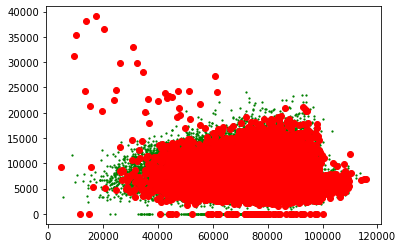

In [5]:
# место для кода
plt.scatter(X[X['IsBadBuy']==0]['VehOdo'], X[X['IsBadBuy']==0]['MMRCurrentRetailAveragePrice'], c='g', s=1.5)
plt.scatter(X[X['IsBadBuy']==1]['VehOdo'], X[X['IsBadBuy']==1]['MMRCurrentRetailAveragePrice'], c='r')

# Регрессия

In [57]:
X = df[['VehicleAge', 'Make', 'Transmission', 'WheelType', 'VehOdo', 'VehBCost', 'VNZIP1', 'WarrantyCost', 'AUCGUART', 'PRIMEUNIT']]
y = df['IsBadBuy']

In [58]:
X.head()

,VehicleAge,Make,Transmission,WheelType,VehOdo,VehBCost,VNZIP1,WarrantyCost,AUCGUART,PRIMEUNIT
0,3,MAZDA,AUTO,Alloy,89046,7100.0,33619,1113,unknown,unknown
1,5,DODGE,AUTO,Alloy,93593,7600.0,33619,1053,unknown,unknown
2,4,DODGE,AUTO,Covers,73807,4900.0,33619,1389,unknown,unknown
3,5,DODGE,AUTO,Alloy,65617,4100.0,33619,630,unknown,unknown
4,4,FORD,MANUAL,Covers,69367,4000.0,33619,1020,unknown,unknown


In [59]:
X = pd.get_dummies(X, columns=["Make"])

In [60]:
X = pd.get_dummies(X, columns=["Transmission"])
X = pd.get_dummies(X, columns=["WheelType"])
X = pd.get_dummies(X, columns=["PRIMEUNIT"])
X = pd.get_dummies(X, columns=["AUCGUART"])

In [21]:
X

,VehicleAge,VehOdo,VehBCost,VNZIP1,WarrantyCost,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,...,WheelType_Alloy,WheelType_Covers,WheelType_Special,WheelType_unknown,PRIMEUNIT_NO,PRIMEUNIT_YES,PRIMEUNIT_unknown,AUCGUART_GREEN,AUCGUART_RED,AUCGUART_unknown
0,3,89046,7100.0,33619,1113,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,5,93593,7600.0,33619,1053,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,4,73807,4900.0,33619,1389,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,5,65617,4100.0,33619,630,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,4,69367,4000.0,33619,1020,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,8,45234,4200.0,30212,993,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
72979,2,71759,6200.0,30212,1038,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
72980,4,88500,8200.0,30212,1893,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
72981,3,79554,7000.0,30212,1974,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [61]:
for i in ['VehicleAge', 'VehOdo', 'VehBCost', 'VNZIP1', 'WarrantyCost']:
    max_val = max(X[i])
    X[i] = X[i] / max_val

In [23]:
X

,VehicleAge,VehOdo,VehBCost,VNZIP1,WarrantyCost,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,...,WheelType_Alloy,WheelType_Covers,WheelType_Special,WheelType_unknown,PRIMEUNIT_NO,PRIMEUNIT_YES,PRIMEUNIT_unknown,AUCGUART_GREEN,AUCGUART_RED,AUCGUART_unknown
0,0.333333,0.769515,0.156150,0.338819,0.148440,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,0.555556,0.808809,0.167147,0.338819,0.140437,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,0.444444,0.637823,0.107766,0.338819,0.185249,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,0.555556,0.567047,0.090171,0.338819,0.084022,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,0.444444,0.599454,0.087972,0.338819,0.136036,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,0.888889,0.390902,0.092371,0.304483,0.132435,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
72979,0.222222,0.620125,0.136357,0.304483,0.138437,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
72980,0.444444,0.764797,0.180343,0.304483,0.252467,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
72981,0.333333,0.687488,0.153951,0.304483,0.263270,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [62]:
pca = decomposition.PCA(n_components=5)
pca.fit(X)
X = pca.transform(X)

In [48]:
X

array([[ 0.68057297, -0.04711845, -0.09501979],
       [ 0.63054133, -0.48513025, -0.25883426],
       [-0.7661497 , -0.57366778, -0.20127952],
       ...,
       [ 0.70288218, -0.04437581, -0.0938649 ],
       [ 0.58655678,  0.82401474, -0.20953598],
       [ 0.67267209, -0.05254943, -0.10070013]])

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# место для кода
from sklearn import *
model1 = linear_model.LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [65]:
# место для кода
y_pred = model1.predict(X_test)

In [40]:
y_pred

array([0.11159046, 0.12868337, 0.14292089, ..., 0.07642589, 0.12596123,
       0.0932663 ])

## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [41]:
# место для кода
predictionClass = np.array([1 if y_pred[i] > 0.1 else 0 for i in range(y_pred.shape[0])])

In [84]:
print(predictionClass)

[0 0 0 ... 0 0 0]


## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [29]:
print(np.count_nonzero(predictionClass))

10556


In [66]:
# место для кода
predictionClass = np.array([1 if y_pred[i] > 0.1 else 0 for i in range(y_pred.shape[0])])
print(metrics.classification_report(y_test, predictionClass))

              precision    recall  f1-score   support

           0       0.93      0.27      0.42     19212
           1       0.14      0.86      0.24      2683

    accuracy                           0.35     21895
   macro avg       0.54      0.57      0.33     21895
weighted avg       0.84      0.35      0.40     21895



In [67]:
predictionClass = np.array([1 if y_pred[i] > 0.15 else 0 for i in range(y_pred.shape[0])])
print(np.count_nonzero(predictionClass))
print(metrics.classification_report(y_test, predictionClass))

4028
              precision    recall  f1-score   support

           0       0.89      0.82      0.85     19212
           1       0.16      0.24      0.19      2683

    accuracy                           0.75     21895
   macro avg       0.52      0.53      0.52     21895
weighted avg       0.80      0.75      0.77     21895



In [68]:
predictionClass = np.array([1 if y_pred[i] > 0.5 else 0 for i in range(y_pred.shape[0])])
print(metrics.classification_report(y_test, predictionClass))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     19212
           1       0.00      0.00      0.00      2683

    accuracy                           0.88     21895
   macro avg       0.44      0.50      0.47     21895
weighted avg       0.77      0.88      0.82     21895



/home/crytox/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [143]:
# место для кода
model2 = tree.DecisionTreeClassifier(max_depth=20)
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20)

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [144]:
# место для кода
y_pred2 = model2.predict_proba(X_test)

## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [145]:
y_pred2

array([[1.        , 0.        ],
       [0.98611111, 0.01388889],
       [0.91202346, 0.08797654],
       ...,
       [0.95360825, 0.04639175],
       [0.93064091, 0.06935909],
       [1.        , 0.        ]])

In [146]:
# место для кода
predictionClass2 = np.array([0 if y_pred2[i][0] > 0.5 else 1 for i in range(y_pred2.shape[0])])

# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [34]:
# место для кода
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [139]:
# место для кода
model2 = tree.DecisionTreeClassifier(max_depth=20)
model2.fit(X_train,y_train)
y_pred2 = model2.predict_proba(X_test)
predictionClass2 = np.array([0 if y_pred2[i][0] > 0.9 else 1 for i in range(y_pred2.shape[0])])
print(metrics.accuracy_score(y_test, predictionClass2))
print(metrics.classification_report(y_test, predictionClass2))

0.7391587312461465
              precision    recall  f1-score   support

           0       0.91      0.78      0.84     25642
           1       0.22      0.46      0.30      3552

    accuracy                           0.74     29194
   macro avg       0.57      0.62      0.57     29194
weighted avg       0.83      0.74      0.77     29194



In [100]:
model2 = tree.DecisionTreeClassifier(max_depth=15)
model2.fit(X_train,y_train)
y_pred2 = model2.predict_proba(X_test)
predictionClass2 = np.array([0 if y_pred2[i][0] > 0.8 else 1 for i in range(y_pred2.shape[0])])
print(metrics.accuracy_score(y_test, predictionClass2))
print(metrics.classification_report(y_test, predictionClass2))

0.8572651914777009
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     25642
           1       0.39      0.31      0.35      3552

    accuracy                           0.86     29194
   macro avg       0.65      0.62      0.63     29194
weighted avg       0.84      0.86      0.85     29194



In [109]:
model2 = tree.DecisionTreeClassifier(max_depth=10)
model2.fit(X_train,y_train)
y_pred2 = model2.predict_proba(X_test)
predictionClass2 = np.array([0 if y_pred2[i][0] > 0.8 else 1 for i in range(y_pred2.shape[0])])
print(metrics.accuracy_score(y_test, predictionClass2))
print(metrics.classification_report(y_test, predictionClass2))

0.8672329930807701
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     25642
           1       0.44      0.35      0.39      3552

    accuracy                           0.87     29194
   macro avg       0.68      0.64      0.66     29194
weighted avg       0.86      0.87      0.86     29194



In [110]:
model2 = tree.DecisionTreeClassifier(max_depth=5)
model2.fit(X_train,y_train)
y_pred2 = model2.predict_proba(X_test)
predictionClass2 = np.array([0 if y_pred2[i][0] > 0.7 else 1 for i in range(y_pred2.shape[0])])
print(metrics.accuracy_score(y_test, predictionClass2))
print(metrics.classification_report(y_test, predictionClass2))

0.8884702336096458
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     25642
           1       0.58      0.30      0.39      3552

    accuracy                           0.89     29194
   macro avg       0.75      0.63      0.67     29194
weighted avg       0.87      0.89      0.87     29194



In [66]:
model2 = tree.DecisionTreeClassifier(max_depth=3)
model2.fit(X_train,y_train)
y_pred2 = model2.predict_proba(X_test)
predictionClass2 = np.array([0 if y_pred2[i][0] > 0.7 else 1 for i in range(y_pred2.shape[0])])
print(metrics.accuracy_score(y_test, predictionClass2))
print(metrics.classification_report(y_test, predictionClass2))

0.8955607316571899
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     25642
           1       0.69      0.25      0.37      3552

    accuracy                           0.90     29194
   macro avg       0.80      0.62      0.66     29194
weighted avg       0.88      0.90      0.87     29194



# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [ ]:
# место для кода


## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



In [ ]:
# место для кода